<a href="https://colab.research.google.com/github/efemeryczny/tsp/blob/main/tsp_kmwd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the city graph with distances
city_graph = {
    'Wroclaw': {'Katowice': 196, 'Krakow': 273, 'Warsaw': 355, 'Szczecin': 398, 'Poznan': 181, 'Lodz': 222, 'Olsztyn': 509, 'Kielce': 348, 'Gdansk': 483, 'Bydgoszcz': 311, 'Rzeszow': 437, 'Opole': 98, 'Lublin': 240, 'Bialystok': 452, 'Zielona Gora': 192},
    'Katowice': {'Wroclaw': 196, 'Krakow': 81, 'Warsaw': 294, 'Szczecin': 571, 'Poznan': 380, 'Lodz': 203, 'Olsztyn': 472, 'Kielce': 159, 'Gdansk': 519, 'Bydgoszcz': 405, 'Rzeszow': 245, 'Opole': 113, 'Lublin': 413, 'Bialystok': 488, 'Zielona Gora': 365},
    'Krakow': {'Wroclaw': 273, 'Katowice': 81, 'Warsaw': 291, 'Szczecin': 648, 'Poznan': 457, 'Lodz': 281, 'Olsztyn': 511, 'Kielce': 114, 'Gdansk': 596, 'Bydgoszcz': 482, 'Rzeszow': 167, 'Opole': 190, 'Lublin': 335, 'Bialystok': 495, 'Zielona Gora': 442},
    'Warsaw': {'Wroclaw': 355, 'Katowice': 294, 'Krakow': 291, 'Szczecin': 566, 'Poznan': 313, 'Lodz': 133, 'Olsztyn': 214, 'Kielce': 178, 'Gdansk': 340, 'Bydgoszcz': 306, 'Rzeszow': 330, 'Opole': 312, 'Lublin': 173, 'Bialystok': 199, 'Zielona Gora': 457},
    'Szczecin': {'Wroclaw': 398, 'Katowice': 571, 'Krakow': 648, 'Warsaw': 566, 'Poznan': 264, 'Lodz': 473, 'Olsztyn': 538, 'Kielce': 619, 'Gdansk': 370, 'Bydgoszcz': 259, 'Rzeszow': 812, 'Opole': 472, 'Lublin': 733, 'Bialystok': 754, 'Zielona Gora': 213},   
    'Poznan': {'Wroclaw': 181, 'Katowice': 380, 'Krakow': 457, 'Warsaw': 313, 'Szczecin': 264, 'Lodz': 218, 'Olsztyn': 351, 'Kielce': 364, 'Gdansk': 311, 'Bydgoszcz': 138, 'Rzeszow': 625, 'Opole': 285, 'Lublin': 478, 'Bialystok': 498, 'Zielona Gora': 153},
    'Lodz': {'Wroclaw': 222, 'Katowice': 203, 'Krakow': 281, 'Warsaw': 133, 'Szczecin': 473, 'Poznan': 218, 'Olsztyn': 291, 'Kielce': 153, 'Gdansk': 340, 'Bydgoszcz': 226, 'Rzeszow': 445, 'Opole': 203, 'Lublin': 306, 'Bialystok': 327, 'Zielona Gora': 348},
    'Olsztyn': {'Wroclaw': 509, 'Katowice': 472, 'Krakow': 511, 'Warsaw': 214, 'Szczecin': 538, 'Poznan': 351, 'Lodz': 291, 'Kielce': 397, 'Gdansk': 166, 'Bydgoszcz': 212, 'Rzeszow': 552, 'Opole': 492, 'Lublin': 395, 'Bialystok': 226, 'Zielona Gora': 498},
    'Kielce': {'Wroclaw': 348, 'Katowice': 159, 'Krakow': 114, 'Warsaw': 178, 'Szczecin': 619, 'Poznan': 364, 'Lodz': 153, 'Olsztyn': 397, 'Gdansk': 470, 'Bydgoszcz': 356, 'Rzeszow': 156, 'Opole': 265, 'Lublin': 193, 'Bialystok': 382, 'Zielona Gora': 507},
    'Gdansk': {'Wroclaw': 483, 'Katowice': 519, 'Krakow': 596, 'Warsaw': 340, 'Szczecin': 370, 'Poznan': 311, 'Lodz': 340, 'Olsztyn': 166, 'Kielce': 470, 'Bydgoszcz': 166, 'Rzeszow': 678, 'Opole': 536, 'Lublin': 521, 'Bialystok': 391, 'Zielona Gora': 451},
    'Bydgoszcz': {'Wroclaw': 311, 'Katowice': 405, 'Krakow': 482, 'Warsaw': 306, 'Szczecin': 259, 'Poznan': 138, 'Lodz': 226, 'Olsztyn': 212, 'Kielce': 356, 'Gdansk': 166, 'Rzeszow': 634, 'Opole': 414, 'Lublin': 477, 'Bialystok': 414, 'Zielona Gora': 282},
    'Rzeszow': {'Wroclaw': 437, 'Katowice': 245, 'Krakow': 167, 'Warsaw': 330, 'Szczecin': 812, 'Poznan': 625, 'Lodz': 445, 'Olsztyn': 552, 'Kielce': 156, 'Gdansk': 678, 'Bydgoszcz': 634, 'Opole': 355, 'Lublin': 177, 'Bialystok': 413, 'Zielona Gora': 606},
    'Opole': {'Wroclaw': 98, 'Katowice': 113, 'Krakow': 190, 'Warsaw': 312, 'Szczecin': 472, 'Poznan': 285, 'Lodz': 203, 'Olsztyn': 492, 'Kielce': 265, 'Gdansk': 536, 'Bydgoszcz': 414, 'Rzeszow': 355, 'Lublin': 523, 'Bialystok': 507, 'Zielona Gora': 268},
    'Lublin': {'Wroclaw': 350, 'Katowice': 413, 'Krakow': 335, 'Warsaw': 173, 'Szczecin': 733, 'Poznan': 478, 'Lodz': 306, 'Olsztyn': 395, 'Kielce': 193, 'Gdansk': 521, 'Bydgoszcz': 477, 'Rzeszow': 177, 'Opole': 523, 'Bialystok': 350, 'Zielona Gora': 621},
    'Bialystok': {'Wroclaw': 507, 'Katowice': 488, 'Krakow': 495, 'Warsaw': 199, 'Szczecin': 754, 'Poznan': 498, 'Lodz': 327, 'Olsztyn': 226, 'Kielce': 382, 'Gdansk': 391, 'Bydgoszcz': 414, 'Rzeszow': 413, 'Opole': 507, 'Lublin': 350, 'Zielona Gora': 641},
    'Zielona Gora': {'Wroclaw': 192, 'Katowice': 365, 'Krakow': 442, 'Warsaw': 457, 'Szczecin': 213, 'Poznan': 153, 'Lodz': 348, 'Olsztyn': 498, 'Kielce': 507, 'Gdansk': 451, 'Bydgoszcz': 282, 'Rzeszow': 606, 'Opole': 268, 'Lublin': 621, 'Bialystok': 641},
}



Shortest Path: ['Wroclaw', 'Gdansk', 'Kielce', 'Bydgoszcz', 'Olsztyn', 'Rzeszow', 'Lodz', 'Opole', 'Poznan', 'Lublin', 'Szczecin', 'Bialystok', 'Warsaw', 'Krakow', 'Zielona Gora', 'Katowice', 'Wroclaw']
Total Distance: 6464


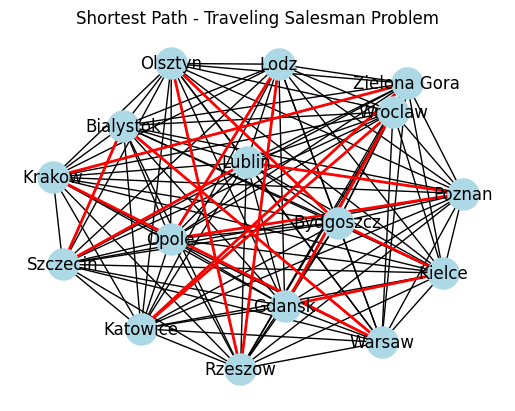

In [15]:
# Create a graph object
G = nx.Graph(city_graph)

# Define the cities to visit
cities = [
    'Wroclaw', 'Katowice', 'Krakow', 'Warsaw', 'Szczecin', 'Poznan', 'Lodz',
    'Olsztyn', 'Kielce', 'Gdansk', 'Bydgoszcz', 'Rzeszow', 'Opole',
    'Lublin', 'Bialystok', 'Zielona Gora'
]

# Add an edge from the last city to the starting city to complete the cycle
G.add_edge(cities[-1], cities[0], weight=city_graph[cities[-1]][cities[0]])

# Calculate the shortest path
shortest_path = nx.approximation.traveling_salesman_problem(G, weight='weight', cycle=True)

# Print the shortest path
print('Shortest Path:', shortest_path)

# Calculate the total distance of the shortest path
total_distance = sum(city_graph[u][v] for u, v in zip(shortest_path, shortest_path[1:]))
print('Total Distance:', total_distance)

# Visualize the graph and shortest path
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos=pos, edgelist=[(u, v) for u, v in zip(shortest_path, shortest_path[1:])], edge_color='red', width=2)
plt.title('Shortest Path - Traveling Salesman Problem')
plt.axis('off')
plt.show()